# Analysis of Average Hometown Income and Professional Sports Participation

## Names

- Zixuan Zhang
- Mark Quinby
- Chelsea Challacombe
- Melissa Lopez

## Group Members IDs

- A14757632
- A14777134
- A12886877
- A13775685

## Research Question

How do socioeconomic differences between US cities affect professional sports participation, specifically the NBA and NFL? 

## Background and Prior Work


We know that youth sports are a very important aspects in households and families due to the physical, mental, and social benefits they potentially provide for young athletes. Youth sports are also enjoyable for the parents of these young athletes because they get to watch their kids play or be involved as coaches and mentors. But, parents allowing their kids to play sports can come at a cost as they may spend hundreds to thousands of dollars monthly in sports gear, team fees, and camp fees. We know this from personal experience, as some of us grew up playing baseball, soccer, cross-country, football, and basketball. Playing these sports has taken a lot of time and money at our parents’ expense in order for us to personally grow and succeed as athletes. Even now, for those of us who are college athletes, parents are still helping us financially so that we are able to participate in sports. It is not until an athlete becomes professional that parents conventionally stop assisting financially and providing opportunities for higher level athletics. For example, during high school baseball offseasons–in the fall and summer– many players will choose to play for travel teams or attend showcases to strengthen their chances at being recognized and recruited by college or professional scouts and coaches. From personal experience, these showcases and travel teams are not cheap and parents have paid thousands of dollars to improve their kid’s chances at playing higher level baseball in college, which in turn will places them on the spotlight and increases their chances at being drafted by a professional baseball team. All in all,  being able to afford not only the gear/ equipment needed for playing the sport, but also the different fees that come with joining teams, showcases, camps, traveling, etc. can be costly and better sustained by parents with high incomes.

Over the years, youth sports participation has declined in low-income families and has increased in middle to high income families. According to the article titled “American Meritocracy Is Killing Youth Sports,” by the magazine, *The Atlantic*, this is predominantly because parents with higher incomes tend to spend about seven times more on their child than parents with low-incomes. This does not necessarily mean that high income parents gain seven times more than the low income parents do, it means that a larger portion of their total income is devoted to the happiness of their kids. Because richer parents tend to spend more on their kids’ extracurricular activities, some kids begin participating in competitive sport leagues from the time at which they can kick a ball; starting at such a young age gives these kids an advantageous opportunity to excel in middle school and high school sports due to their experience, getting the attention of higher-level competitive colleges and leagues. 

In addition, *USA Today* wrote an article “Why Families Stretch Their Budgets for Higher-Priced Youth Sports”, giving insight to parents’ spending tendencies for their child’s sports participation. This article started off with an inside look at a family’s expenditures towards their son’s golfing career as a 7 year old. The parents explain how supportive they were for their son’s participation in golf and how they must cut back on family vacations, savings for 401(k)s, and entertainment costs to help pay for tournaments. The reason for these sacrifices were stated to be “an athletic scholarship and good education...playing on the PGA Tour one day would a ‘bonus’”. This family is not alone when it comes to dropping thousands of dollars for their child’s sports as nearly 20% of families spend over $12,000 a year, per child, for similar reasons(other extracurricular activities or sports). Even with the slim chances of any young athlete making to the professional stage, many parents are willing to spend a lot of money for their child’s possible future in that sport; however, many parents are simply content with investing into something that keeps their children happy and motivated. Even parents who aren’t as capable of affording to do so will risk living paycheck to paycheck in order to keep their child’s dreams alive as well as to provide good opportunities for development. 



References:
- 1) https://www.theatlantic.com/ideas/archive/2018/11/income-inequality-explains-decline-youth-sports/574975/
- 2) https://www.usatoday.com/story/money/2017/09/05/why-families-stretch-their-budgets-high-priced-youth-sports/571945001/

## Hypothesis


Professional football and basketball players in the United States are more likely to have grown up in high income areas than low income areas.


## Datasets

#### NFL Basic Statistics
https://www.kaggle.com/kendallgillies/nflstatistics#Basic_Stats.csv

15 Observations: Age, Height, Birth place, birthday, college, current status, current team, experience, height, high school, high school location, name, number, player ID, position, weight, number of years played.

This CSV file provides us with specific data for each player and describes observations relating to their hometowns, birth place, position played, and performance during games.

#### NBA Census
https://www.besttickets.com/blog/unofficial-2013-nba-census/ 

Observations: Name, Age, Income, Team, Position, Height, Weight, years of experience, birth date, school, city, state, country, race, and whether they attended college level.

This CSV file provides us with specific data for each individual player describing their hometowns, birth place, income, team, and position. It included data for players outside of the United States, which we have filtered out.

#### US Household Income Statistics
https://www.kaggle.com/goldenoakresearch/us-household-income-stats-geo-locations

Observations: ID number, State, County, City, Zip code, Area code, Lat, long, mean, median, STDV.

This dataset predominantly focuses on the average incomes of cities and areas across the United States. It distinguishes the data through a variety of observations.

##### Combining the data sets: 
We combined the data sets merging alll of the player's hometowns, and correlating each hometown with the average income found in the Income Statistics data set. More thorough description of this process can be found below, under "Combining Data".

## Setup
We configure our settings for the data analysis here, importing the libraries we need and setting the display options.

Below, we import the libraries and set preferences to make plots look nicer.

In [4]:
#import sys
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install seaborn

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set()

pd.options.display.max_rows = 10
pd.options.display.max_columns = 8

pd.set_option('precision', 2)

Read in the raw data sets, and see their basic shape:

In [6]:
df_Basic_Stats = pd.read_csv('Basic_Stats.csv')
df_income = pd.read_csv('kaggle_income.csv', encoding = "ISO-8859-1")
df_NBA = pd.read_csv('NBA-Census-10.14.2013.csv', encoding = "ISO-8859-1")

In [4]:
print(df_Basic_Stats.shape)
print(df_income.shape)
print(df_NBA.shape)

(17172, 16)
(32526, 19)
(528, 17)


# Data Cleaning

First, we need to drop the columns from the data frames that are not needed. In the NFL Basic stats, this keeps the Birthplace of the players. The NBA data keeps the city, state and country. For the income data, we keep the State name, state abbreviation, city, and the mean yearly income.



In [7]:
df_Basic_Stats.columns

Index(['Age', 'Birth Place', 'Birthday', 'College', 'Current Status',
       'Current Team', 'Experience', 'Height (inches)', 'High School',
       'High School Location', 'Name', 'Number', 'Player Id', 'Position',
       'Weight (lbs)', 'Years Played'],
      dtype='object')

In [8]:
df_Basic_Stats = df_Basic_Stats.drop(['Age', 'Birthday', 'College', 'Current Status',
                                      'Current Team', 'Experience', 'Height (inches)',
                                      'High School', 'High School Location','Name', 'Number', 'Player Id', 'Position',
                                      'Weight (lbs)', 'Years Played'], axis=1)
df_Basic_Stats = df_Basic_Stats.rename(columns={'Birth Place': 'City'})
df_Basic_Stats.columns

Index(['City'], dtype='object')

In [9]:
df_income = df_income.drop(['id', 'County', 'State_Code', 'Place',
       'Type', 'Primary', 'Zip_Code', 'Area_Code', 'ALand', 'AWater', 'Lat',
       'Lon', 'Median', 'Stdev', 'sum_w', 'State_Name'], axis=1)
df_income.columns

Index(['State_ab', 'City', 'Mean'], dtype='object')

Because some NBA players are non-American, we drop their data


In [10]:
df_NBA = df_NBA[df_NBA['Country'] == 'US']
df_NBA = df_NBA.drop(['Name', 'Age', 'Team', 'POS', '#', '2013 $', 'Ht (In.)', 'WT', 'EXP',
       '1st Year', 'DOB', 'Race', 'HS Only','School', 'State (Province, Territory, Etc..)', 'Country'], axis=1)
df_NBA.columns

Index(['City'], dtype='object')

## Missingness
We then checked for missingness for each data frame, and removed the NaN values accordingly. This required removing NaNs in the Basic_Stats and NBA data frames, as the Income data frame didn't contain empty values.


How many null values exist in each of the data frames:

In [9]:
print("Basic stats: \n", df_Basic_Stats.isnull().sum())
print("\nNBA: \n", df_NBA.isnull().sum())
print("\nIncome: \n", df_income.isnull().sum())

Basic stats: 
 City    2378
dtype: int64

NBA: 
 City    0
dtype: int64

Income: 
 State_ab    0
City        0
Mean        0
dtype: int64


Drop missing values:

In [11]:
df_income = df_income[df_income['Mean'] != 0]

In [12]:
df_Basic_Stats.dropna(subset=['City'], inplace=True)
df_Basic_Stats.shape

(14794, 1)

In [13]:
df_NBA.dropna(subset=['City'], inplace=True)
df_NBA.shape

(419, 1)

## Combining Data
In order to merge all of our data, we need to unify location format so that all data frames have the form "City, State Abreviation". Then we need to combine all of the data frames so that each player's hometown corresponds to an average yearly income.
Lastly, we count over these locations and incomes to get a sense of income density.


Unify df_Basic_Stats's "Birth Place" column:


In [14]:
df_Basic_Stats['City'] = [x.replace(' ,', ',') for x in df_Basic_Stats['City']]

Unify df_income's "place" column, by creating a new column called "place" which is combinatin of its columns 'City' and 'State_ab'.

df_income has a lot of duplicated places, so we group by the place and take their mean.


In [15]:

df_income['place'] = df_income[['City', 'State_ab']].apply(lambda x: ', '.join(x.fillna('').map(str)), axis=1)
df_income['place'] = df_income['place'].str.strip(', ')

df_income= df_income.groupby('place').mean()


Merge df_NBA with df_income to create a data frame "df_income_NBA" to only analyze the NBA players:

In [16]:
df_income_NBA = pd.merge(df_NBA, df_income, left_on=['City'], right_on=['place'], how='inner')

Get the number of players for each city, create a new column "NBA_count" to store thenumber of players corresponding to that city:



In [17]:

df_income_NBA['NBA_count'] = df_income_NBA.groupby('City', as_index=False)['City'].transform(lambda s: s.count())
df_income_NBA = df_income_NBA.drop_duplicates(subset='City', keep="last")
df_income_NBA.reset_index(drop=True)


,City,Mean,NBA_count
0,"Riviera Beach, FL",39508.00,1
1,"Sylacauga, AL",48547.25,1
2,"Jackson, MS",46776.23,2
3,"Birmingham, AL",48808.17,3
4,"Los Angeles, CA",61996.47,19
...,...,...,...
214,"Mission Hills, CA",84635.00,1
215,"Zanesville, OH",43846.50,1
216,"Crossett, AR",49533.00,1
217,"Long Lake, MN",116124.67,1


#### df_income_NBA: 
A new data frame correlating NBA players  to the city they're from and the average income of that city.




Merge df_Basic_Stats with df_income to create a data frame "df_income_Bas" to only analyze the NFL players:

In [18]:
df_income_Bas = pd.merge(df_Basic_Stats, df_income, left_on=['City'], right_on=['place'], how='inner')

#### df_income_Bas: 
A new data frame correlating NFL players  to the city they're from and the average income of that city.


Get the number of players for each city, create a new column "Bas_count" to store the number of players corresponding to that city:

In [19]:
df_income_Bas['Bas_count'] = df_income_Bas.groupby('City', as_index=False)['City'].transform(lambda s: s.count())
df_income_Bas = df_income_Bas.drop_duplicates(subset='City', keep="last")
df_income_Bas.reset_index(drop=True)


,City,Mean,Bas_count
0,"Grand Rapids, MI",62063.32,21
1,"Dayton, OH",48861.58,48
2,"Temple, TX",64124.33,10
3,"New Orleans, LA",52022.52,144
4,"Detroit, MI",35734.86,159
...,...,...,...
2872,"Deer Park, TX",115766.00,1
2873,"Berwyn, PA",158724.00,1
2874,"Antelope, CA",71078.00,1
2875,"Ravenswood, WV",51666.00,1


Concatenate df_Basic_Stats with df_NBA to get a new data frame which contains both players data, then merge df_BOTH with df_income called "df_income_BOTH" to analyze the both NFL and NBA players:

In [20]:
df_BOTH = pd.concat([df_Basic_Stats,df_NBA],ignore_index=True)
df_income_BOTH = pd.merge(df_BOTH, df_income, left_on=['City'], right_on=['place'], how='inner')


Count the number of players for each city, create a new column "Both_count" to store the number of players corresponding to that city:

In [21]:
df_income_BOTH['Both_count']=  df_income_BOTH.groupby('City', as_index=False)['City'].transform(lambda s: s.count())
df_income_BOTH = df_income_BOTH.drop_duplicates(subset='City', keep="last")
df_income_BOTH.reset_index(drop=True)


,City,Mean,Both_count
0,"Grand Rapids, MI",62063.32,22
1,"Dayton, OH",48861.58,49
2,"Temple, TX",64124.33,10
3,"New Orleans, LA",52022.52,147
4,"Detroit, MI",35734.86,164
...,...,...,...
2902,"Chatsworth, CA",88913.25,1
2903,"Hendersonville, TN",91811.50,1
2904,"Raeford, NC",41525.00,1
2905,"Prince George, VA",103732.00,1


This adds another column that groups the mean incomes by where they fall in class brackets for low, medium and high income:

In [22]:

df_income_BOTH['class'] = pd.cut(df_income_BOTH['Mean'], bins = [0, 40500, 122000, 188100 ], labels = ['Low', 'Mid', 'High'])

df_income_NBA['class'] = pd.cut(df_income_NBA['Mean'], bins = [0, 40500, 122000, 188100 ], labels = ['Low', 'Mid', 'High'])
df_income_Bas['class'] = pd.cut(df_income_Bas['Mean'], bins = [0, 40500, 122000, 188100 ], labels = ['Low', 'Mid', 'High'])


#### df_income_BOTH:
A data frame with both NFL and NBA players hometowns, the average income of their hometowns, the number of players from that area, and the income classification of that city (high, medium, low).

In [23]:
df_income_BOTH

,City,Mean,Both_count,class
21,"Grand Rapids, MI",62063.32,22,Mid
70,"Dayton, OH",48861.58,49,Mid
80,"Temple, TX",64124.33,10,Mid
227,"New Orleans, LA",52022.52,147,Mid
391,"Detroit, MI",35734.86,164,Low
...,...,...,...,...
13082,"Chatsworth, CA",88913.25,1,Mid
13083,"Hendersonville, TN",91811.50,1,Mid
13084,"Raeford, NC",41525.00,1,Mid
13085,"Prince George, VA",103732.00,1,Mid


In [28]:
df_income_BOTH.groupby('class').count()


,City,Mean,Both_count
class,,,
Low,238,238,238
Mid,2565,2565,2565
High,104,104,104


# Data Analysis & Results

In [59]:
df_income_BOTH.describe()


,Unnamed: 0,Mean,Both_count,lat,lon
count,2907.000000,2907.000000,2907.000000,2907.000000,2907.000000
mean,10075.679051,65801.338271,4.501892,37.591116,-88.978139
std,2696.012572,24306.353116,14.347026,7.217479,16.603119
min,21.000000,15984.000000,1.000000,-51.640411,-159.715000
25%,8639.500000,49595.880952,1.000000,33.691410,-95.620672
50%,10856.000000,59840.818182,2.000000,39.013187,-86.878904
75%,12184.500000,76111.604167,3.000000,41.628786,-80.084329
max,13086.000000,188005.000000,323.000000,64.837845,138.629308


### Descriptive Analysis
   
   After combining the NFL dataset with the NBA dataset, we found:
   - the mean income of the cities players grew up in and discovered a value of roughly $65,801 dollars
   - the minimum income we acknowledged was at a surprisingly low value of $15,984 dollars a year
   - the maximum city income value was at a large $188,005
   - the data portrays an Interquartile Range of $26,515 dollars and shows that fifty percent of the data falls within the range of $76,111 dollars and $49,595 dollars a year.
   
   These values clearly underscore the fact that some athletes grew up in impoverished areas whereas others grew up in wealthy areas. Approaching this from the perspective of a normal distribution, most of the values fall within a reasonable income range, with the exception of a few high income values. Our goal is to further describe the correlation, if any, between the area these athletes grew up in and their professional sports achievement.






### Exploratory Data Analysis
Our data explores the relationship between the average income of the hometowns of professional athletes and their participation in this professional sports industry.

**Structure**: The file format of our data is tabular; All of the files were originally CSV files. We joined two of our datasets in order to attain the average income of the hometowns of these professional athletes. We used an inner merge on the location variable (City or Place).

**Granularity**: Every observation represents the characteristics and descriptive data about each individual player rather than a particular average regarding an entire team or group. The data is about each individual player and is not summarized over time. When we acquired the average income for each city, we did have to summarize numbers and sum up specific variables (Income variable). Then, we explored the correlation between the average income of players’ hometowns and the corresponding professional players.

**Scope**: The population corresponding to our question includes all male professional athletes in the United States. However, for the simplicity of our research, we are focusing our data analysis on sports data samples corresponding to NBA and NFL players. Our data is as complete as it could be although other socioeconomic factors –such as race, number of family members, etc– would have been useful.

**Temporality**: The datasets we are working with all contain data that was attained at a specific time and year. The NBA dataset was collected in 2013 whereas the NFL dataset was collected in 2016. The datasets do not contain observations that were recorded over a period of time, they only contain data taken at a specific time. 

**Faithfulness**: Our data is a strong synopsis concerning the average income of the hometowns that professional athletes surfaced from. However,  the NBA dataset is drastically smaller than the NFL dataset, which only affects our visualization pertaining to the average income of the hometowns of these professional players. This is further discussed under the analysis of the graphs, displaying the distribution for the NFL dataset as broken and choppy. All of our values are reasonable and make sense, for there are no future  dates or absurd birth dates. Additionally, there was no missing data; therefore, we did not have to fill in anything by hand.
 
**Inconsistencies**:  Our data contains consistent and reliable values. The only inconsistency may be related to the two outliers pertaining to the hometown income of two NFL players – both values which surpass the highest hometown income in the NBA dataset, roughly being $130,000 a year.


# Visualizations

### Density Plot and Histogram


In [23]:
## Set up color palette for seaborn
current_palette = sns.color_palette("colorblind")
sns.set_palette(current_palette)
#print out color palette
#sns.palplot(current_palette)

Text(0.5, 0, 'Average Income')

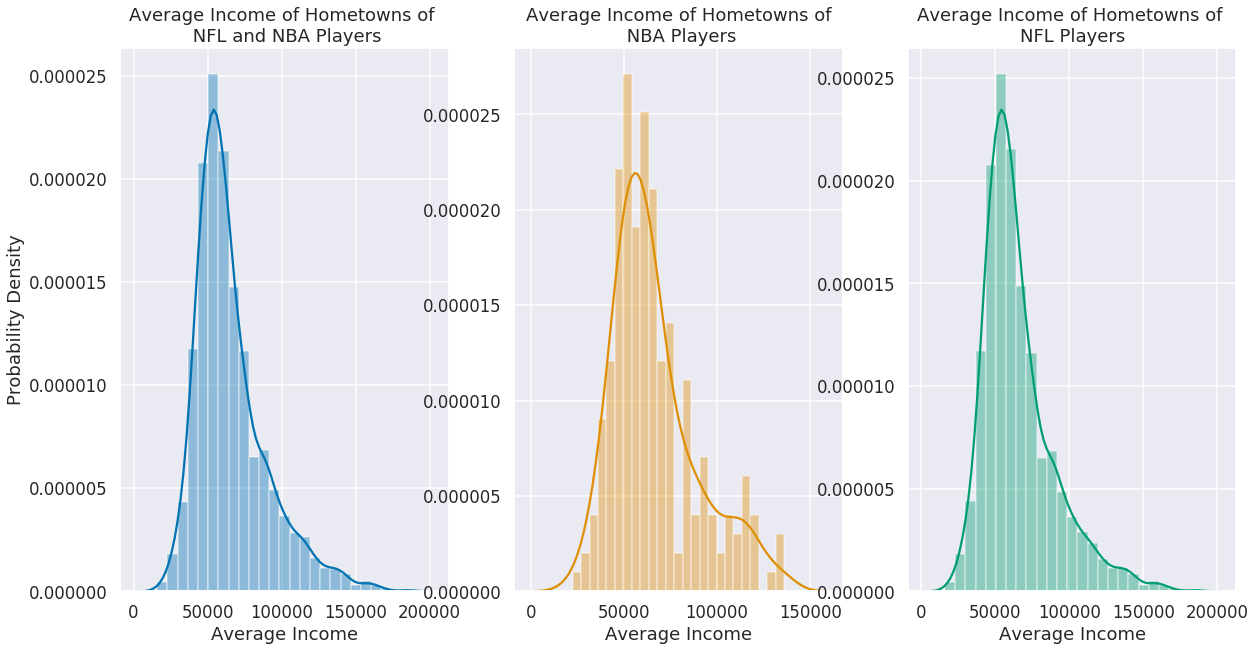

In [24]:
# Shows a somewhat normal distribution.

## set multiple columns for 3 graphs
fig, ax = plt.subplots(figsize=(20,10), ncols=3, nrows=1)

##Both NBA and NFL players
ax1 =sns.distplot(df_income_BOTH['Mean'], bins = 25, ax = ax[0])
ax1.set_title('Average Income of Hometowns of \n NFL and NBA Players')
ax1.set_xlabel('Average Income')
ax1.set_ylabel('Probability Density')
plt.rcParams['xtick.labelsize'] = 15


#JUST NBA 
ax2 = sns.distplot(df_income_NBA['Mean'], bins = 25, ax = ax[1], color = current_palette[1])
ax2.set_title('Average Income of Hometowns of\n NBA Players')
ax2.set_xlabel('Average Income')

# Just NFL
ax3 = sns.distplot(df_income_Bas['Mean'], bins = 25, ax = ax[2], color = current_palette[2])
ax3.set_title('Average Income of Hometowns of \nNFL Players')
ax3.set_xlabel('Average Income')


The distribution graphs show that there is a constant increase in density until between the mean income $60,000 ~ $70,000 dollars, which holds its place as the peak number of professional players. The average player's hometown income is around $65,000 dollars. It shows a positively skewed graph which illustrates that only a small percentage of players come from high-income areas, while most of the players come from middle or even low-income areas. 

The middle graph with just the NBA players appears to be slightly choppy. This may be due to the smaller number of players sampled in the NBA data set.

### Proportional Bar and Box Plots 

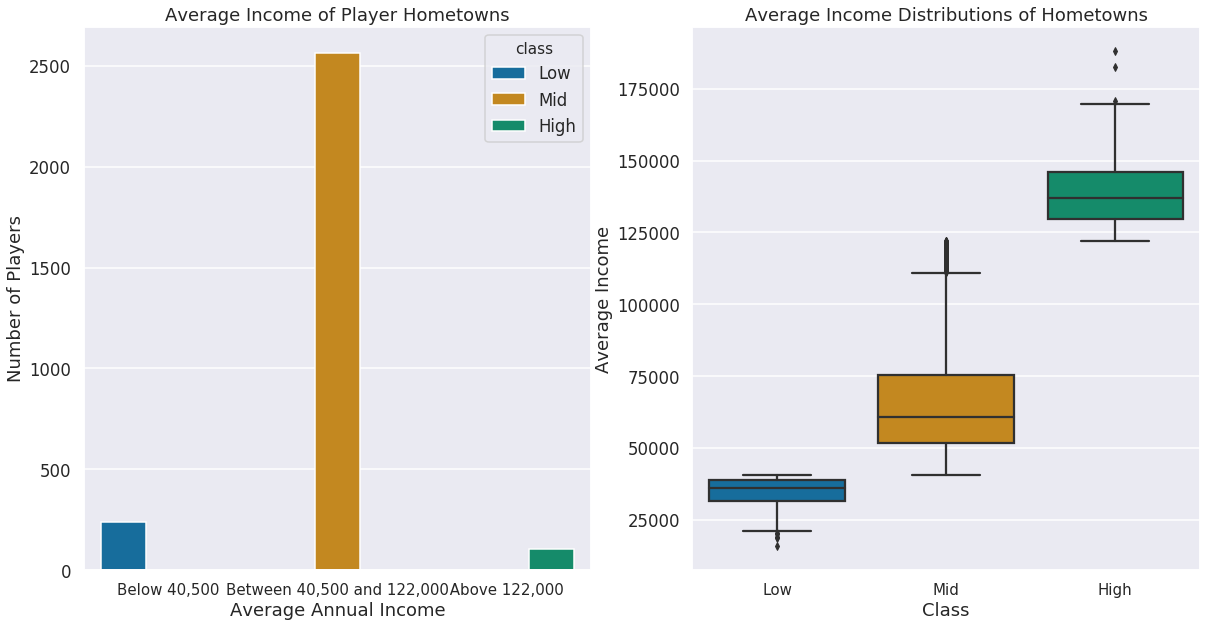

In [25]:
#fig, ax = plt.subplots(figsize=(20,5), ncols=3, nrows=1)
fig, ax = plt.subplots(figsize=(20,10), ncols=2, nrows=1)

ax1= sns.countplot(x = 'class', hue = 'class', data = df_income_BOTH, ax = ax[0])
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
ax1.set_title("Average Income of Player Hometowns")
ax1.set_ylabel('Number of Players')
ax1.set_xlabel('Average Annual Income')
ax1.set_xticklabels(("Below 40,500", " Between 40,500 and 122,000 ", " Above 122,000 "))
ax1 = plt.gca()

ax2 = sns.boxplot(x="class", y="Mean", data=df_income_BOTH, ax = ax[1])
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
ax2.set_title("Average Income Distributions of Hometowns")
ax2.set_ylabel('Average Income')
ax2.set_xlabel('Class')
ax2 = plt.gca()



   This graph displays the distributions for the incomes of low, middle, and high classes. 
The box plot to the left (blue boxplot) represents the average income distribution for the low class. It has a  surprisingly low minimum value of $15,984 dollars, which falls beneath the lower whisker of the boxplot in place with a few other outliers. Aside from these outstandingly low values, the rest of the low-income distribution is predominantly centered at an average income value of roughly $37,000 dollars, with a few values underneath the lower quartile extending the bottom whisker more than the upper whisker– making the boxplot skewed towards the lowest income values. The highest average income for the low-income hometowns does not exceed the value of $42,000 dollars a year.

The boxplot at the center of the graph (mustard-colored boxplot) represents the distributions for the incomes of the hometowns under the middle-class category. It is slightly skewed towards the upper whisker and 3rd quartile, with many concentrated outliers surpassing the upper whisker and reaching values of up to $123,000 dollars. The Interquartile range for this boxplot is of $24,000 dollars, meaning that the first and third quartiles are not that far apart from each other. This implies a rather normal distribution with a median of roughly $63,000 dollars.
    
Finally, the right-most boxplot (green boxplot) illustrates the average income distribution for the upper class. It is skewed towards the upper whisker with three outliers – the farthest one attaining a value of $188,005 dollars a year. The Interquartile range of roughly $16,000 dollars demonstrates that most of our high-income data is consistent around the median of $137,500 dollars. Aside from the outliers and the skewdness of the boxplot, the distribution appears to be consistent and normal.

We used the following as a reference for the low/medium/high class split: https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx

### OpenCageData API and Folium Map Visualization

We wanted a way to visualize the distribution of the player's hometowns and income in a way that is natural for an audience to read.

Initially, we started using a heatmap, but after creating it, realized that it does not very accurately show the income distribution, but rather the location density of players in the USA.

We discarded this idea, and instead used circle markers and conditional statements so the location is shown, along with the class status. This gives a visual representation of the spatial location of the player's hometowns, as well as the number of them from that area, and where the players mean income of that area falls, all on the same map.

Below is the setup for the OpenCageData API, which allows mapping from City name to latitude and longitude coordinates. [This](https://amaral.northwestern.edu/blog/getting-long-lat-list-cities) tutorial was used for this map creation.

First, install if not already installed using: 

In [58]:
#import sys
#!{sys.executable} -m pip install opencage
#!{sys.executable} -m pip install folium


The API key is given upon creation of a free acount, however it only allows 2500 queries. So, df_cut1 and df_cut2 are separate data frames using two API keys to get around this road block, as the total size of our data frame is just under 3000 rows and it would introduce bias if only the first 2500 rows were used.

In a for loop, this queries the API for the latitude and longitude of each city in our merged data frame, then creates new columns with the latitude and longitude.

In [27]:
df_cut= df_income_BOTH
df_cut1 =df_income_BOTH[:2500]
df_cut1.shape
df_cut2 = df_income_BOTH[2500:]
df_cut2.shape

(407, 4)

In [28]:
from opencage.geocoder import OpenCageGeocode
key = '8201f22457b94aafa782a058234b5e2e' 
geocoder = OpenCageGeocode(key)


lat = []
lon = []
for index, row in df_cut1.iterrows():
    query = row['City']
    results = geocoder.geocode(query)
    lat.append(results[0]['geometry']['lat'])
    lon.append(results[0]['geometry']['lng'])

key2 = 'd212e31b5c064ce4911f6baad02e0a79'
geocoder2 = OpenCageGeocode(key2)

for index, row in df_cut2.iterrows():
    query = row['City']
    results = geocoder2.geocode(query)
    lat.append(results[0]['geometry']['lat'])
    lon.append(results[0]['geometry']['lng'])
    
    
df_income_BOTH['lat'] = lat
df_income_BOTH['lon'] = lon


It takes a lot of time and computer processing power to complete the above queries, so we saved the results to a CSV to make future mapping easier.

In [29]:
#df_income_BOTH.to_csv('latlon.csv')
df_income_BOTH = pd.read_csv('latlon.csv')

Folium is used for the map visualization. It supports an interactive map with latitude and longitude coordinates.
Below, we iterate over our entire data frame, and depending on where the player's hometown falls in the income brackets, we plot the player's hometown as different colors on the map.
Light green represents low income, gray middle class, and red upper class.

In [55]:
import folium as folium
from folium import plugins
from folium.plugins import HeatMap

map = folium.Map(location=[48, -102], zoom_start=3)


In [56]:

mid = 40500
high = 122000
for row in df_income_BOTH.itertuples():
    if row.Mean < mid: 
        map.add_child(folium.Circle(radius = 100, location=[row.lat,row.lon],color = 'lightgreen'))
    elif row.Mean > high:
        map.add_child(folium.Circle(radius =100, location=[row.lat, row.lon],color = 'red'))
    else:
        map.add_child(folium.Circle(radius =100, location=[row.lat,row.lon],color = 'gray'))
        
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 100px; height: 130px; 
                            border:2px solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Household Class Income <br>
                              &nbsp; Low &nbsp; <i class="fa fa-map-marker fa-2x" style="color:lightgreen"></i><br>
                              &nbsp; Medium &nbsp; <i class="fa fa-map-marker fa-2x" style="color:gray"></i><br>
                              &nbsp; High  &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i>

                </div>
                ''' 
map.get_root().html.add_child(folium.Element(legend_html))



The map does not show up in github, so we saved it and reuploaded it as a .jpeg so we are able to see it inline.

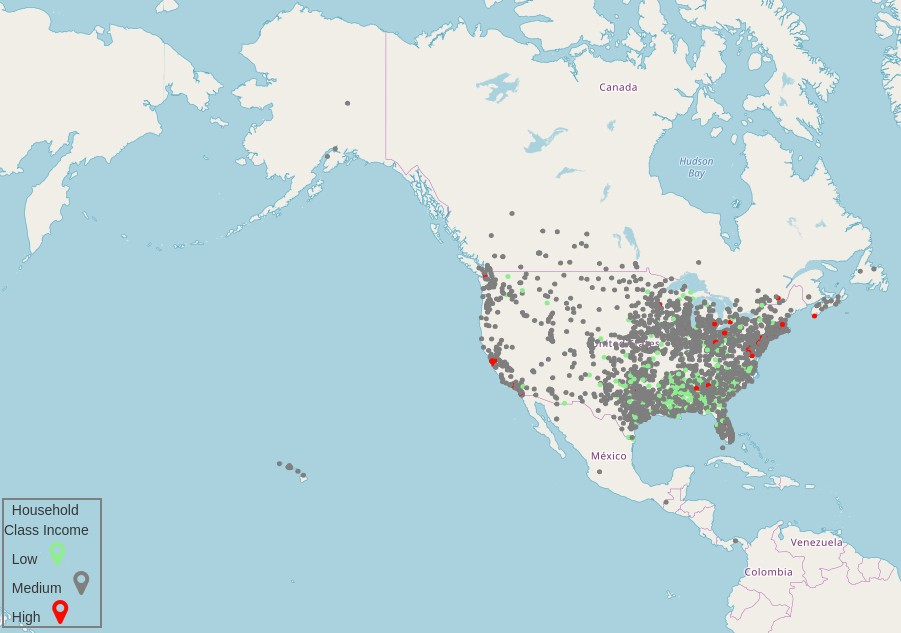

In [3]:
from IPython.display import Image
Image(filename='map.jpg')


From the map above, we can see that there is a very large amount of middle class players' hometowns across the United Sates. It also becomes more apparent that the lower income areas are more frequent and evenly spread across the country, while the high income is clustered around largely populated cities, and there are multiple dots right on top of eachother.
Spatially, it is difficult to distinctly tell the totals of each income category, as we are only able to make assumptions based off of the dots visible. This visualization is useful for analyzing concentration across the United States, but not for specific values.


# Ethics & Privacy

When extracting and manipulating data for research, it is extremely important to understand the implications of the data we are using and posting. We must acknowledge and understand all aspects of our data so we do not release any personal information that could be traced back to those individuals and cause them harm- for example any names, addresses, emails with names, birth date, racial information etc. For our research, we are using professional athlete’s birth towns so we take out any personal information, such as their names, addresses, zip codes, etc. These guidelines are given by the Safe Harbor Method, which specifies that we should clear out any personally identifiable data presented when conducting our research. After collecting our data sets and obscuring all personal information, we must consider that the data we post/publish could still be harmful to the public and anyone who sees it. One of our data sets provides the race for each individual provided. We were contemplating creating a visualization that would show a correlation between race, income and the likelihood of someone playing professional sports. In our analysis, we also are stating that a certain race or socioeconomic status is more or less likely to play professional sports, which may come across as stating that those factors affect how successful they are. Because this shows certain groups as being less successful, this could impact the way they are thought of as professional athletes, or how successful they could be, negatively influencing others’ opinions of someone falling into the less prominent groups. Consequently, after analysing and interpreting the results, we must make sure that we do not post any form of personal information or any prejudice or racist information that could negatively impact any individual or group. 


# Conclusion & Discussion

Our hypothesis was not necessarily correct. We were hoping to show that professional NFL and NBA players came from towns with high average incomes, and expected the majority of players to come from high income areas.

Based on our analysis, the majority of the NFL and NBA athletes are from counties with middle class average income. In total, there are 2,565 players in the mid income bracket. Further, the data is skewed towards lower average income, with 238 falling into that bracket versus 104 that fall into the high income bracket.

We did not expect to see the wealthier incomes clustered around populated cities, with the lower and middle class areas spread evenly across the country.


However, we also only considered the average income of player hometowns, not the actual income of their family. As a result, we were only able to generalize as to what their situation could have been like growing up, however the athlete's actual income could have been much higher or lower than the average incme of their area. 
What the average income likely reflects, however, is the player's overall circumstances growing up- a less wealthy area will not have as many resources for students or athletes readily available. 

Additionally, our income classifications did not take into account the standards of living for different areas across the United States. For instance, the price of housing in San Jose means that a family that would be classified as "wealthy" in another area is actually middle class relatively.

Data containing information about the player's family size and actual income would be more accurate for future work, but was not available online.

